# 7.1.5 MLPRegressor

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
    
import warnings
warnings.filterwarnings("ignore")

Se desea construir un regresor para la siguiente función:

In [4]:
x = [-3.5000, -3.2941, -3.0882, -2.8824, -2.6765,
     -2.4706, -2.2647, -2.0588, -1.8529, -1.6471,
     -1.4412, -1.2353, -1.0294, -0.8235, -0.6176,
     -0.4118, -0.2059,  0.0000,  0.2059,  0.4118,
      0.6176,  0.8235,  1.0294,  1.2353,  1.4412,
      1.6471,  1.8529,  2.0588,  2.2647,  2.4706,
      2.6765,  2.8824,  3.0882,  3.2941,  3.5000]

y = [ 0.0000,  0.0000,  0.0001,  0.0002,  0.0008,
      0.0022,  0.0059,  0.0144,  0.0323,  0.0664,
      0.1253,  0.2174,  0.3466,  0.5075,  0.6828,
      0.8440,  0.9585,  1.0000,  0.9585,  0.8440,
      0.6828,  0.5075,  0.3466,  0.2174,  0.1253,
      0.0664,  0.0323,  0.0144,  0.0059,  0.0022,
      0.0008,  0.0002,  0.0001,  0.0000,  0.0000]

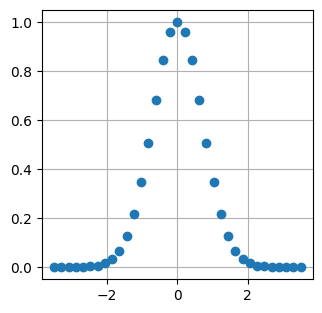

In [5]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(x, y, 'o')
plt.grid()
plt.show()

En el caso de regresión, la activación de la neurona de salida es realizada con la función identidad $g(u)=u$.

Para problemas de regresión, la función de pérdida es el error cuadrático medio:

$$ Loss(\hat{y},y,W) = \frac{1}{2n} \sum_{i=0}^{n} ||\hat{y_i} − y_i||_2^2 + \frac{\alpha}{2n}||W||_2^2 $$

donde el último término es la norma L2.

Cuando se usa el gradiente descendente, los pesos son calculados como:

$$ W^{k+1} = W^{k} − \mu \ \delta \ loss^k_W $$

In [6]:
mlpRegressor = MLPRegressor(
    # --------------------------------------------------------------------------
    # The ith element represents the number of neurons in the ith hidden layer.
    hidden_layer_sizes=(6,),
    # --------------------------------------------------------------------------
    # Activation function for the hidden layer.
    # * ‘identity’
    # * 'logistic'
    # * 'tanh'
    # * 'relu'
    # activation='relu',
    activation="logistic",
    # --------------------------------------------------------------------------
    # The solver for weight optimization.
    # * 'lbfgs'
    # * 'sgd'
    # * 'adam'
    solver="adam",
    # --------------------------------------------------------------------------
    # Strength of the L2 regularization term.
    alpha=0.0001,
    # --------------------------------------------------------------------------
    # Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’,
    # the classifier will not use minibatch. When set to “auto”,
    # batch_size=min(200, n_samples).
    batch_size='auto',
    # --------------------------------------------------------------------------
    # Learning rate schedule for weight updates. Only used when solver=’sgd’.
    # * ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    # * ‘invscaling’ gradually decreases the learning rate learning_rate_ at
    #   each time step ‘t’ using an inverse scaling exponent of ‘power_t’.
    #   effective_learning_rate = learning_rate_init / pow(t, power_t)
    # * ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as
    #   long as training loss keeps decreasing. Each time two consecutive
    #   epochs fail to decrease training loss by at least tol, or fail to
    #   increase validation score by at least tol if ‘early_stopping’ is on,
    #   the current learning rate is divided by 5.
    learning_rate='constant',
    # --------------------------------------------------------------------------
    # The initial learning rate used. It controls the step-size in updating the
    # weights. Only used when solver=’sgd’ or ‘adam’.
    # learning_rate_init=0.001,
    learning_rate_init=0.1,
    # --------------------------------------------------------------------------
    # The exponent for inverse scaling learning rate. It is used in updating
    # effective learning rate when the learning_rate is set to ‘invscaling’.
    # Only used when solver=’sgd’.
    power_t=0.5,
    # --------------------------------------------------------------------------
    # Maximum number of iterations. The solver iterates until convergence
    # (determined by ‘tol’) or this number of iterations. For stochastic solvers
    # (‘sgd’, ‘adam’), note that this determines the number of epochs (how many
    # times each data point will be used), not the number of gradient steps.
    # default: 200
    max_iter=1000,
    # --------------------------------------------------------------------------
    # Whether to shuffle samples in each iteration. Only used when solver=’sgd’
    # or ‘adam’.
    shuffle=True,
    # --------------------------------------------------------------------------
    # Determines random number generation for weights and bias initialization,
    # train-test split if early stopping is used, and batch sampling when
    # solver=’sgd’ or ‘adam’.
    random_state=None,
    # --------------------------------------------------------------------------
    # Tolerance for the optimization. When the loss or score is not improving
    # by at least tol for n_iter_no_change consecutive iterations, unless
    # learning_rate is set to ‘adaptive’, convergence is considered to be
    # reached and training stops.
    tol=1e-4,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
    # --------------------------------------------------------------------------
    # Momentum for gradient descent update. Should be between 0 and 1. Only
    # used when solver=’sgd’.
    momentum=0.9,
    # --------------------------------------------------------------------------
    # Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and
    # momentum > 0.
    nesterovs_momentum=True,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation score
    # is not improving. If set to true, it will automatically set aside 10% of
    # training data as validation and terminate training when validation score
    # is not improving by at least tol for n_iter_no_change consecutive epochs.
    # Only effective when solver=’sgd’ or ‘adam’.
    early_stopping=False,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.1,
    # --------------------------------------------------------------------------
    # Exponential decay rate for estimates of first moment vector in adam,
    # should be in [0, 1). Only used when solver=’adam’.
    beta_1=0.9,
    # --------------------------------------------------------------------------
    # Exponential decay rate for estimates of second moment vector in adam,
    # should be in [0, 1). Only used when solver=’adam’.
    beta_2=0.999,
    # --------------------------------------------------------------------------
    # Value for numerical stability in adam. Only used when solver=’adam’.
    epsilon=1e-8,
    # --------------------------------------------------------------------------
    # Maximum number of epochs to not meet tol improvement. Only effective when
    # solver=’sgd’ or ‘adam’.
    n_iter_no_change=10,
    # --------------------------------------------------------------------------
    # Only used when solver=’lbfgs’. Maximum number of function calls. The
    # solver iterates until convergence (determined by ‘tol’), number of
    # iterations reaches max_iter, or this number of function calls.
    max_fun=15000,
)

In [7]:
X = np.array(x).reshape(-1, 1)

mlpRegressor.fit(X, y)

MLPRegressor(activation='logistic', hidden_layer_sizes=(6,),
             learning_rate_init=0.1, max_iter=1000)

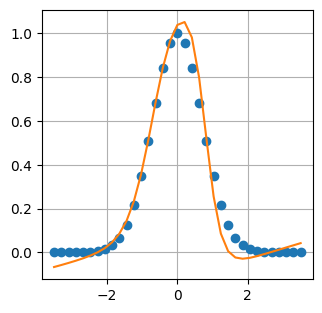

In [8]:
plt.figure(figsize=(3.5, 3.5))

plt.plot(x, y, "o")
plt.grid()
plt.plot(x, mlpRegressor.predict(X), "-");

In [9]:
#
# The current loss computed with the loss function.
#
mlpRegressor.loss_

0.0017635594701494903

In [10]:
#
# The minimum loss reached by the solver throughout fitting.
#
mlpRegressor.best_loss_

0.0016175322406775606

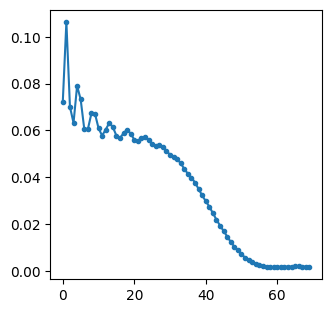

In [11]:
#
# Loss value evaluated at the end of each training step. The ith element in the
# list represents the loss at the ith iteration.
#
plt.figure(figsize=(3.5, 3.5))
plt.plot(mlpRegressor.loss_curve_, ".-")
plt.show()

In [12]:
#
# The ith element in the list represents the weight matrix corresponding to
# layer i.
#
mlpRegressor.coefs_

[array([[-0.17057915,  0.10443211, -2.8879518 , -4.5411471 ,  0.12483852,
         -0.21316567]]),
 array([[-0.29232054],
        [ 0.06727231],
        [-1.10279551],
        [ 1.33530159],
        [ 0.18200161],
        [-0.58539351]])]

In [13]:
#
# The ith element in the list represents the bias vector corresponding to layer
# i + 1.
#
mlpRegressor.intercepts_

[array([ 0.11409192, -0.40526942, -2.03253592,  3.61722053, -0.3095737 ,
         0.16826654]),
 array([0.23425829])]

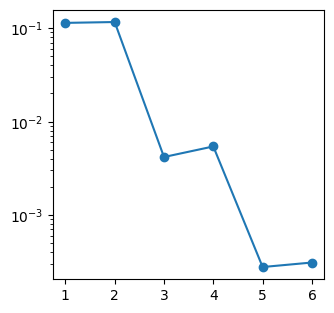

In [14]:
mse = []

for h in range(1, 7):

    mlpRegressor = MLPRegressor(
        hidden_layer_sizes=(h,),
        activation="logistic",
        solver="adam",
        alpha=0.0,
        learning_rate='constant',
        learning_rate_init=0.1,
        max_iter=1000,
        random_state=0,
    )

    mlpRegressor.fit(X, y)
    mse.append(mean_squared_error(y, mlpRegressor.predict(X)))

plt.figure(figsize=(3.5, 3.5))
plt.plot(range(1,7), mse, "-o")
plt.yscale('log')

In [15]:
print('ok_')

ok_
